In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

import torch
import torch.nn as nn
# import torch.optim as optim
# import torchvision
# from ray import tune
from torch.utils.data import DataLoader, TensorDataset #, Dataset
# import torch.nn.functional as F

import wandb
import os
from sklearn.decomposition import PCA
import itertools
import io

from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

import importlib
import functions as f
import random

In [ ]:
# Loading test spectra and background spectra
file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/test_data.csv'
test_spectra = pd.read_csv(file_path)

In [2]:
file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_test_spectra.csv'
synthetic_spectra_df = pd.read_csv(file_path)
# # Saving train and test data as feather files for easier access
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_test_spectra.feather'
# synthetic_spectra_df.to_feather(file_path)
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_train_spectra.csv'
# synthetic_spectra_df = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_train_spectra.feather'
# synthetic_spectra_df.to_feather(file_path)

In [2]:
file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_train_spectra.csv'
synthetic_spectra_df = pd.read_csv(file_path)
file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_train_spectra.feather'
synthetic_spectra_df.to_feather(file_path)

In [4]:
# # Saving train, val and test data as feather files for easier access
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_data.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_data.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_data.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_data.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/test_data.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/test_data.feather'
# data.to_feather(file_path)

In [5]:
# # Saving train, val and test CARLs as feather files for smaller storage
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_carls_avg_backgrounds.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_carls_avg_backgrounds.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_carls_avg_backgrounds.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_carls_avg_backgrounds.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_carls_avg_backgrounds.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_carls_avg_backgrounds.feather'
# data.to_feather(file_path)

In [7]:
# Saving train, val and test CARLs as feather files for smaller storage
file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_train_embeddings.csv'
data = pd.read_csv(file_path)
file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_train_embeddings.feather'
data.to_feather(file_path)

file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_val_embeddings.csv'
data = pd.read_csv(file_path)
file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_val_embeddings.feather'
data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_test_embeddings.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_test_embeddings.feather'
# data.to_feather(file_path)

In [4]:
file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_test_spectra.feather'
thing = pd.read_feather(file_path)
thing.head()

,p_184,p_185,p_186,p_187,p_188,p_189,p_190,p_191,p_192,p_193,...,n_1013,n_1014,n_1015,n_1016,n_1017,n_1018,n_1019,n_1020,n_1021,Label
0,65.764336,69.367642,72.694660,76.381261,80.107734,83.117220,86.700978,92.066234,94.125514,101.267064,...,-37.213677,-37.699324,-38.343668,-37.648249,-36.459618,-36.484299,-38.263547,-37.794550,-37.079086,DEB
1,78.893726,83.245719,87.306460,91.545228,95.716795,100.203288,104.270469,111.076386,114.432432,122.426396,...,-25.631345,-25.695597,-25.841870,-23.811758,-24.085063,-23.704412,-25.057486,-24.157530,-23.879944,DEB
2,62.378163,66.174174,70.102340,73.935880,77.322778,82.426054,85.911612,93.493491,96.127314,105.798394,...,-10.782561,-11.074147,-10.720008,-9.766361,-5.973238,-3.597135,-10.373989,-8.958875,-7.872747,TEPO
3,73.752823,77.428262,80.785646,84.231951,86.317871,91.134834,94.430533,101.013740,105.239301,113.434325,...,2.864106,2.456810,2.877986,1.718761,4.438055,6.265974,2.881210,4.103479,2.900897,TEPO
4,58.072682,59.365884,61.625085,61.946729,64.892801,65.217615,69.531018,68.536674,74.162534,75.991904,...,0.515103,1.375486,0.891603,4.766513,-0.602853,-5.312446,0.679463,-0.550171,2.671079,DMMP


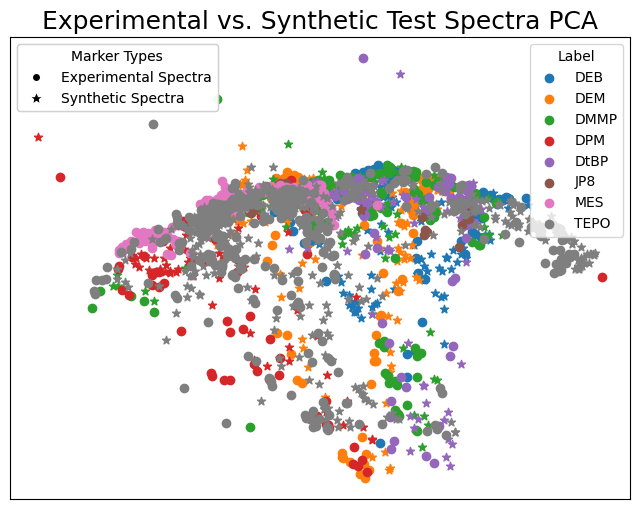

In [ ]:
# Reload the functions module after updates
importlib.reload(f)
sorted_chem_names = list(test_spectra.columns[-8:])

f.plot_generation_results_pca(
        test_spectra.iloc[:,2:-8], synthetic_spectra_df.sample(n=1000, random_state=42), sorted_chem_names, 'Test', sample_size=1000, log_wandb=False,
        mse_insert=None, insert_position=[0.05, 0.05], show_wandb_run_name=False)
# f.plot_generation_results_pca(
#         test_spectra.iloc[:,2:-8], synthetic_spectra_df, sorted_chem_names, 'Test', log_wandb=False,
#         mse_insert=None, insert_position=[0.05, 0.05], show_wandb_run_name=False)

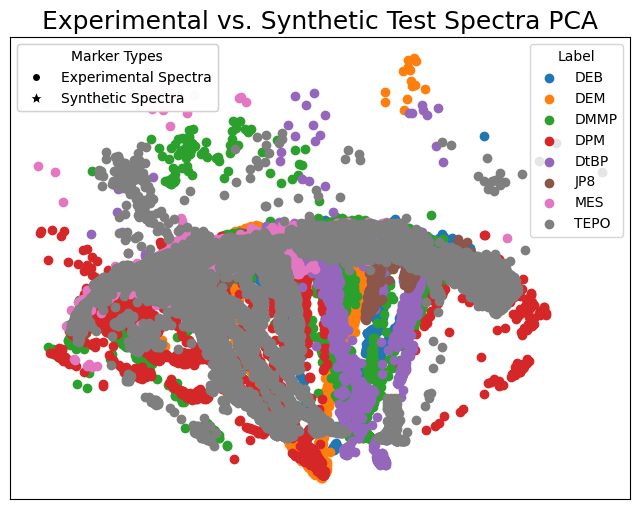

In [ ]:
# Reload the functions module after updates
importlib.reload(f)
# Just looking at the PCA of the true spectra
f.plot_generation_results_pca(
        test_spectra.iloc[:,2:-8], synthetic_spectra_df, sorted_chem_names, 'Test', log_wandb=False,
        mse_insert=None, insert_position=[0.05, 0.05], show_wandb_run_name=False)

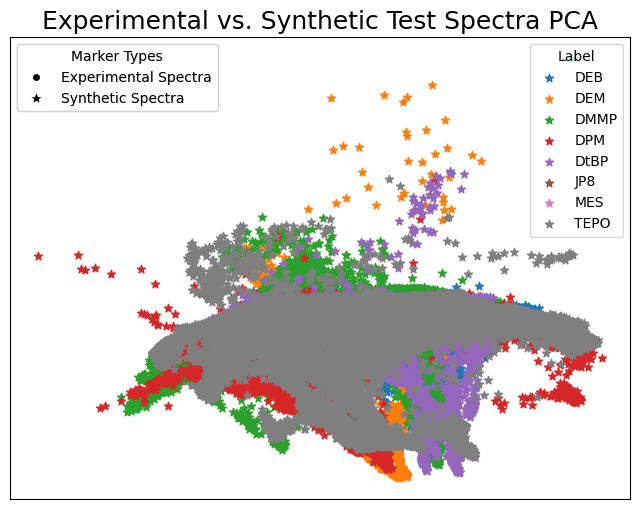

In [ ]:
# Reload the functions module after updates
importlib.reload(f)
# Just looking at the PCA of the synthetic spectra
f.plot_generation_results_pca(
        test_spectra.iloc[:,2:-8], synthetic_spectra_df, sorted_chem_names, 'Test', log_wandb=False,
        mse_insert=None, insert_position=[0.05, 0.05], show_wandb_run_name=False)

In [ ]:
file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_test_spectra.csv'
synthetic_spectra_df = pd.read_csv(file_path)

In [ ]:
sorted_chem_names = list(test_spectra.columns[-8:])

# set plot limits based on entire dataset so that plots scales are the same between chemicals
pca = PCA(n_components=2)
pca.fit(test_spectra.iloc[:,2:-9])
true_transformed = pca.transform(test_spectra.iloc[:, 2:-9])
synthetic_transformed = pca.transform(synthetic_spectra_df.iloc[:, :-1])
min_x = min(true_transformed[:, 0].min(), synthetic_transformed[:, 0].min()) * 1.2
max_x = min(true_transformed[:, 0].max(), synthetic_transformed[:, 0].max()) * 1.2
min_y = min(true_transformed[:, 1].min(), synthetic_transformed[:, 1].min()) * 1.2
max_y = min(true_transformed[:, 1].max(), synthetic_transformed[:, 1].max()) * 1.2

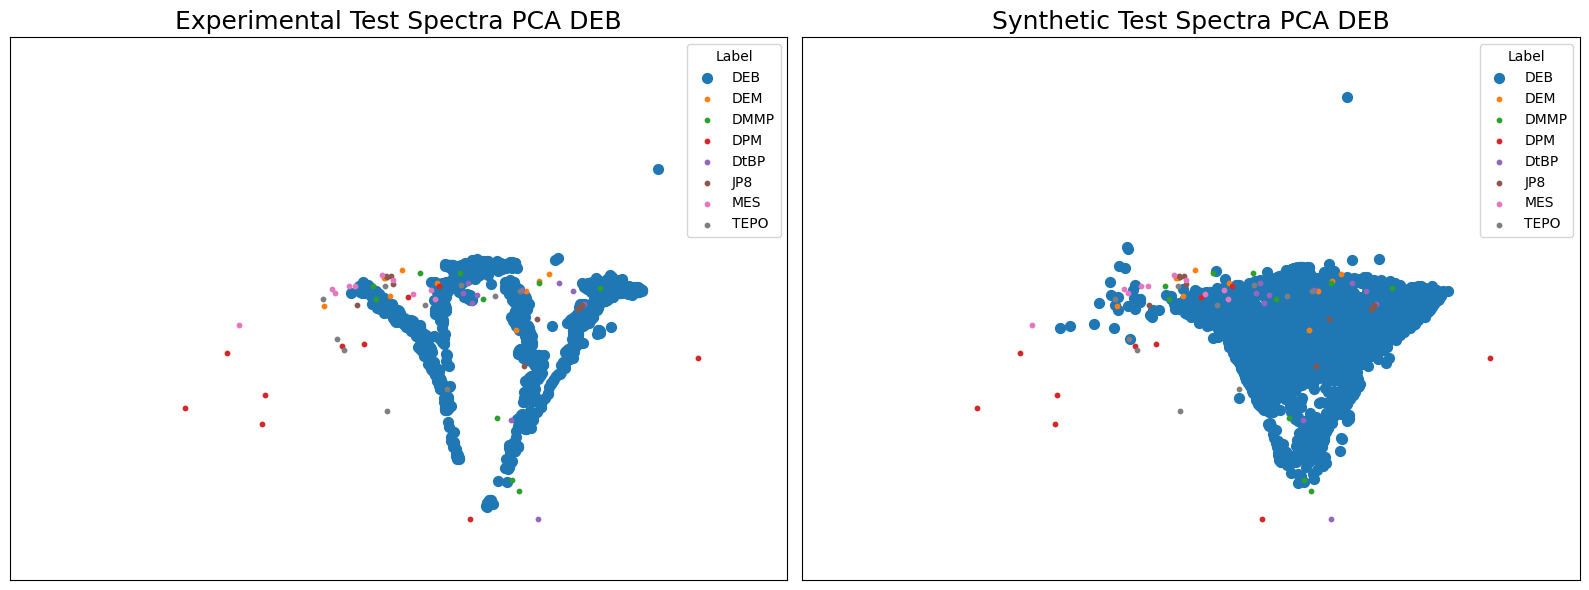

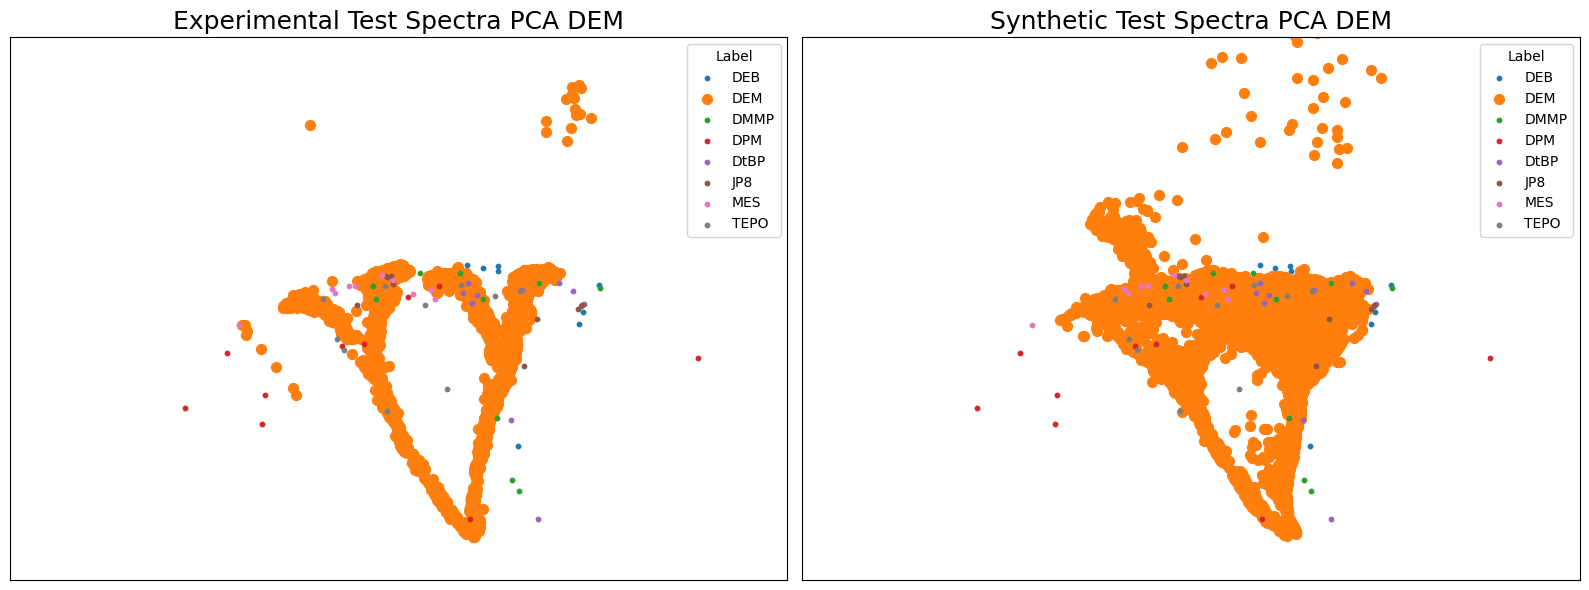

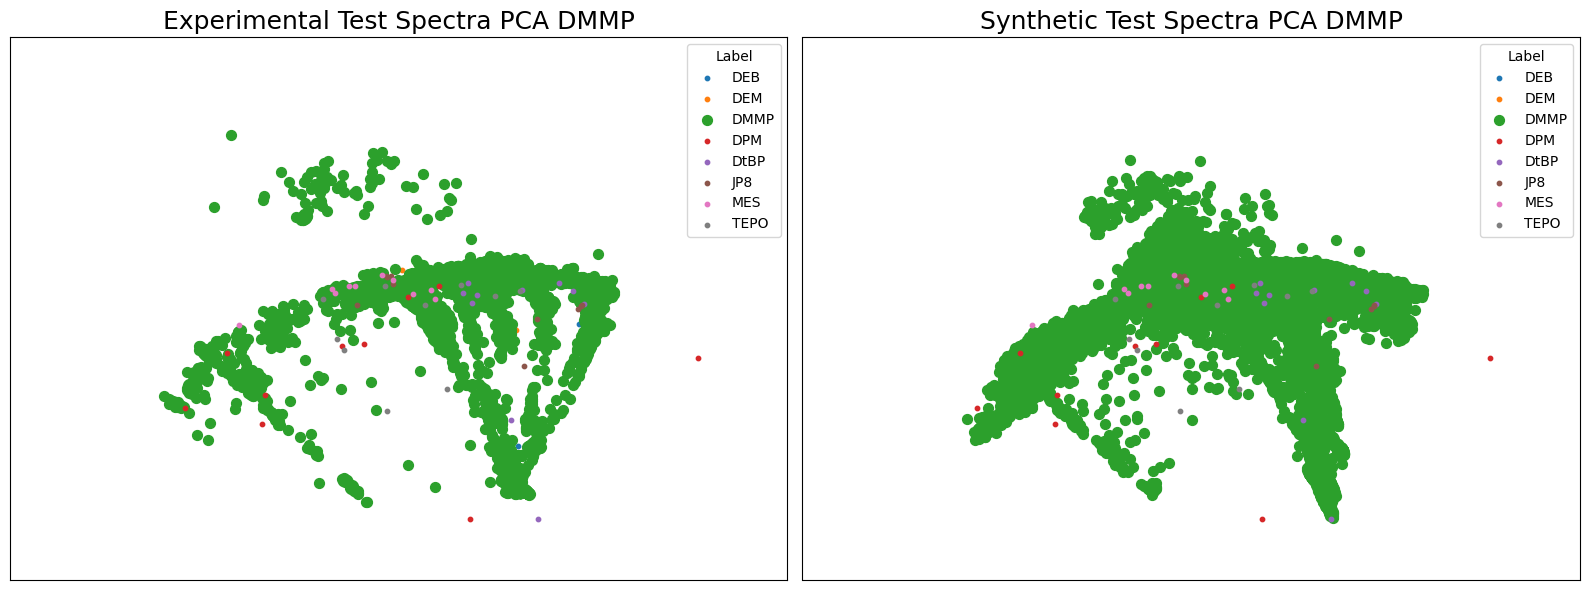

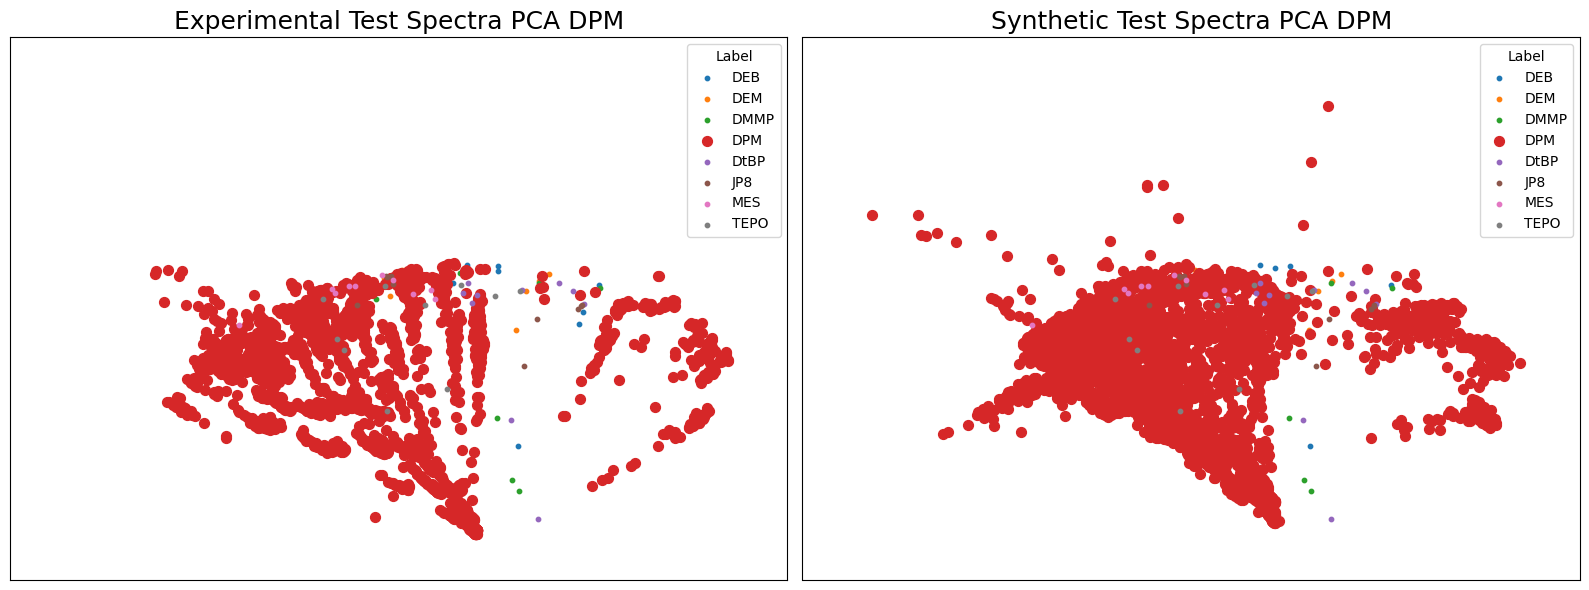

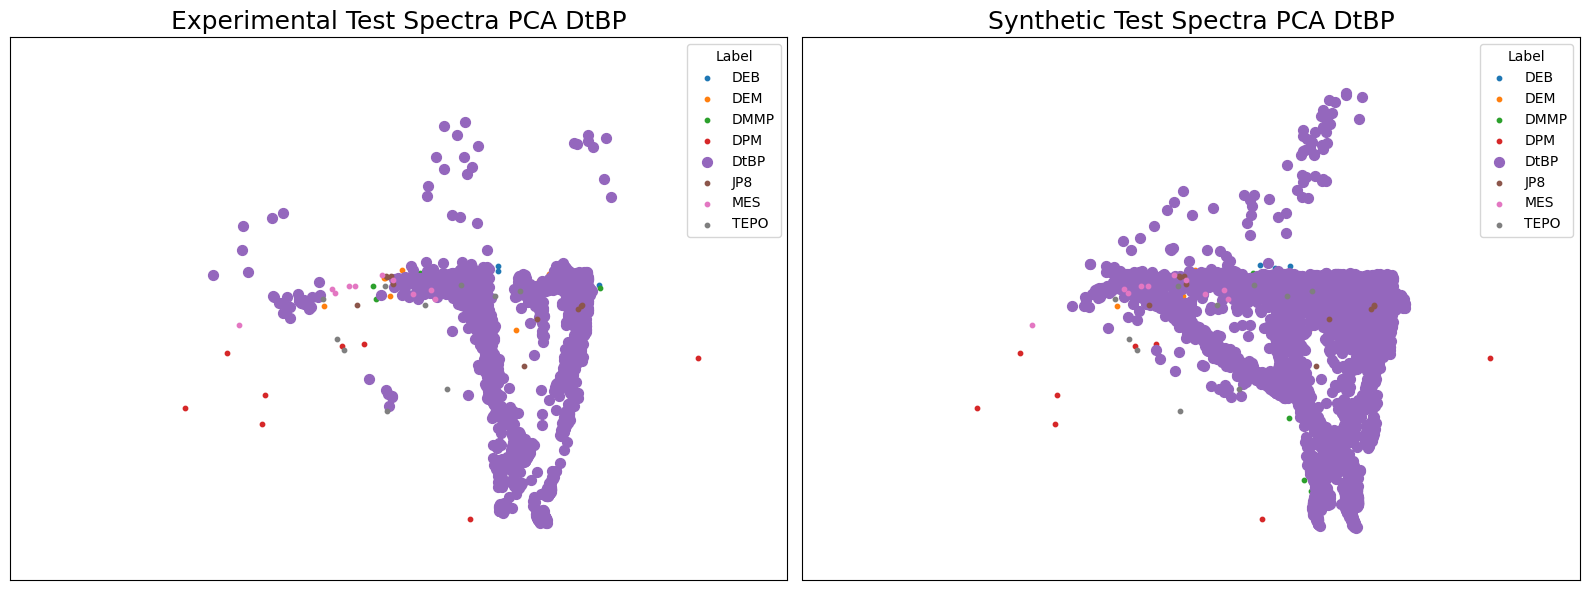

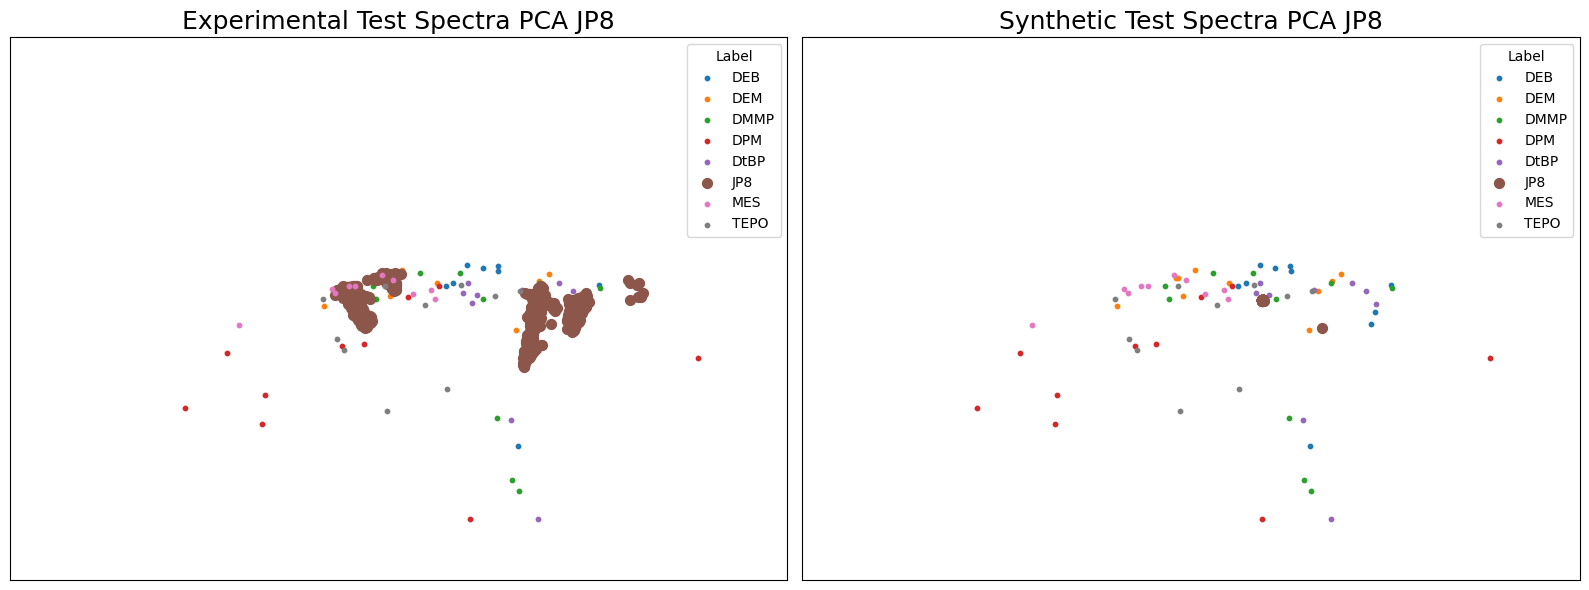

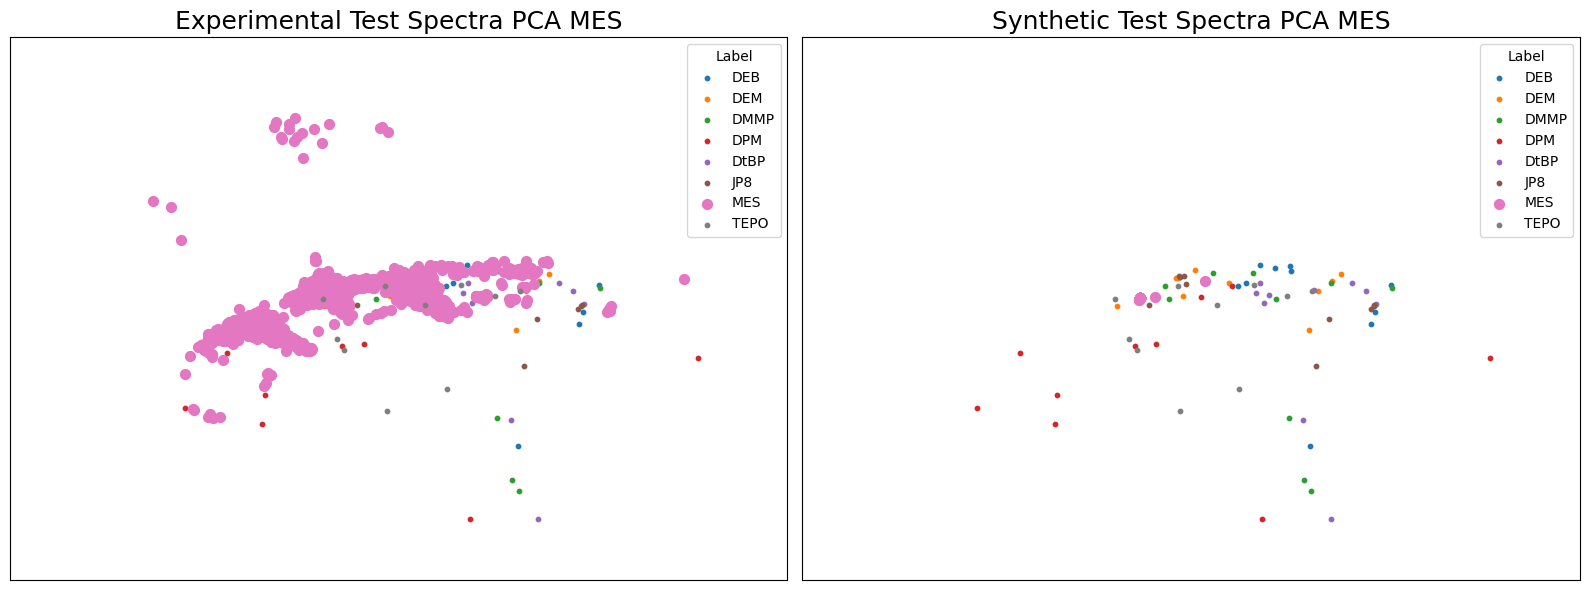

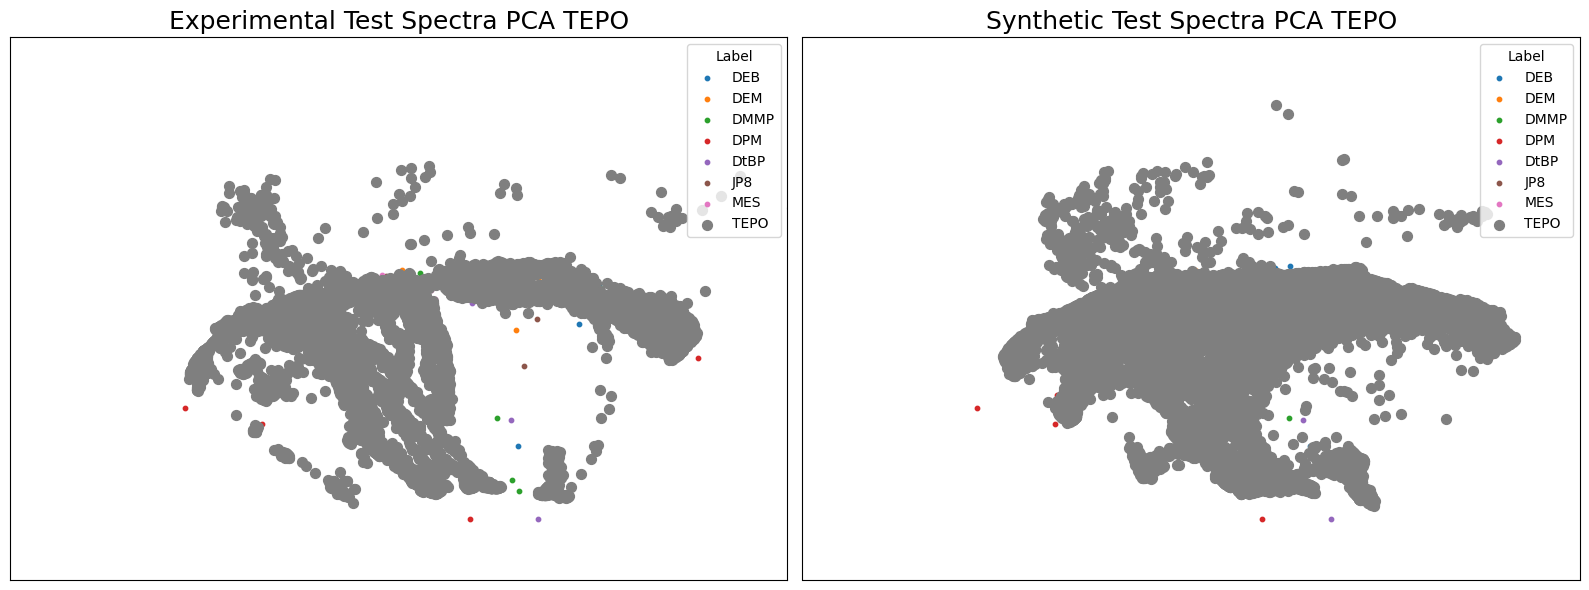

In [ ]:
importlib.reload(f) #PLOTTING FUNCTION BROKEN, need to fix so that it only plots a sample of all data except the chem of interest
# Looking at results one chemical at a time

for chem in sorted_chem_names:
    synthetic_chem_df_sample = pd.DataFrame(synthetic_spectra_df[synthetic_spectra_df['Label'] == chem])#.sample(n=1000, random_state=42)
    f.plot_generation_results_pca_single_chem_side_by_side(
        test_spectra.iloc[:,2:-8], synthetic_chem_df_sample, sorted_chem_names, 
        results_type='Test', chem_of_interest=chem, 
        x_lims=[min_x,max_x], y_lims=[min_y,max_y]
        )

In [ ]:
# # Reload the functions module after updates
# importlib.reload(f)

# preds_list = [pred for pred_list in test_predicted_carls for pred in pred_list]
# indices_list = [ind for ind_list in corresponding_spectra_indices for ind in ind_list]
# test_encodings_list = [enc for enc_list in test_output_name_encodings for enc in enc_list]
# test_predicted_carls_list = [pred for pred_list in test_predicted_carls for pred in pred_list]

# run_name = 'celestial-field-553'
# num_plots = 5

# for _ in range(num_plots):
#     random_num = random.randint(0, len(test_spectra))
#     random_spec_idx = indices_list[random_num]
#     test_chem = sorted_chem_names[list(test_encodings_list[random_num]).index(1)]
#     test_spec = test_spectra[test_spectra['index'] == int(random_spec_idx)].iloc[:, 2:-9].values

#     synthetic_carl = test_predicted_carls_list[random_num]
#     synthetic_spec = convert_carl_to_spectrum(synthetic_carl, random_spec_idx, test_background_list)
    
#     f.plot_spectra_real_synthetic_comparison(
#         test_spec[0], synthetic_spec, 'Test', 
#         test_chem, log_wandb=False, show_wandb_run_name=True, criterion=criterion, run_name=run_name)

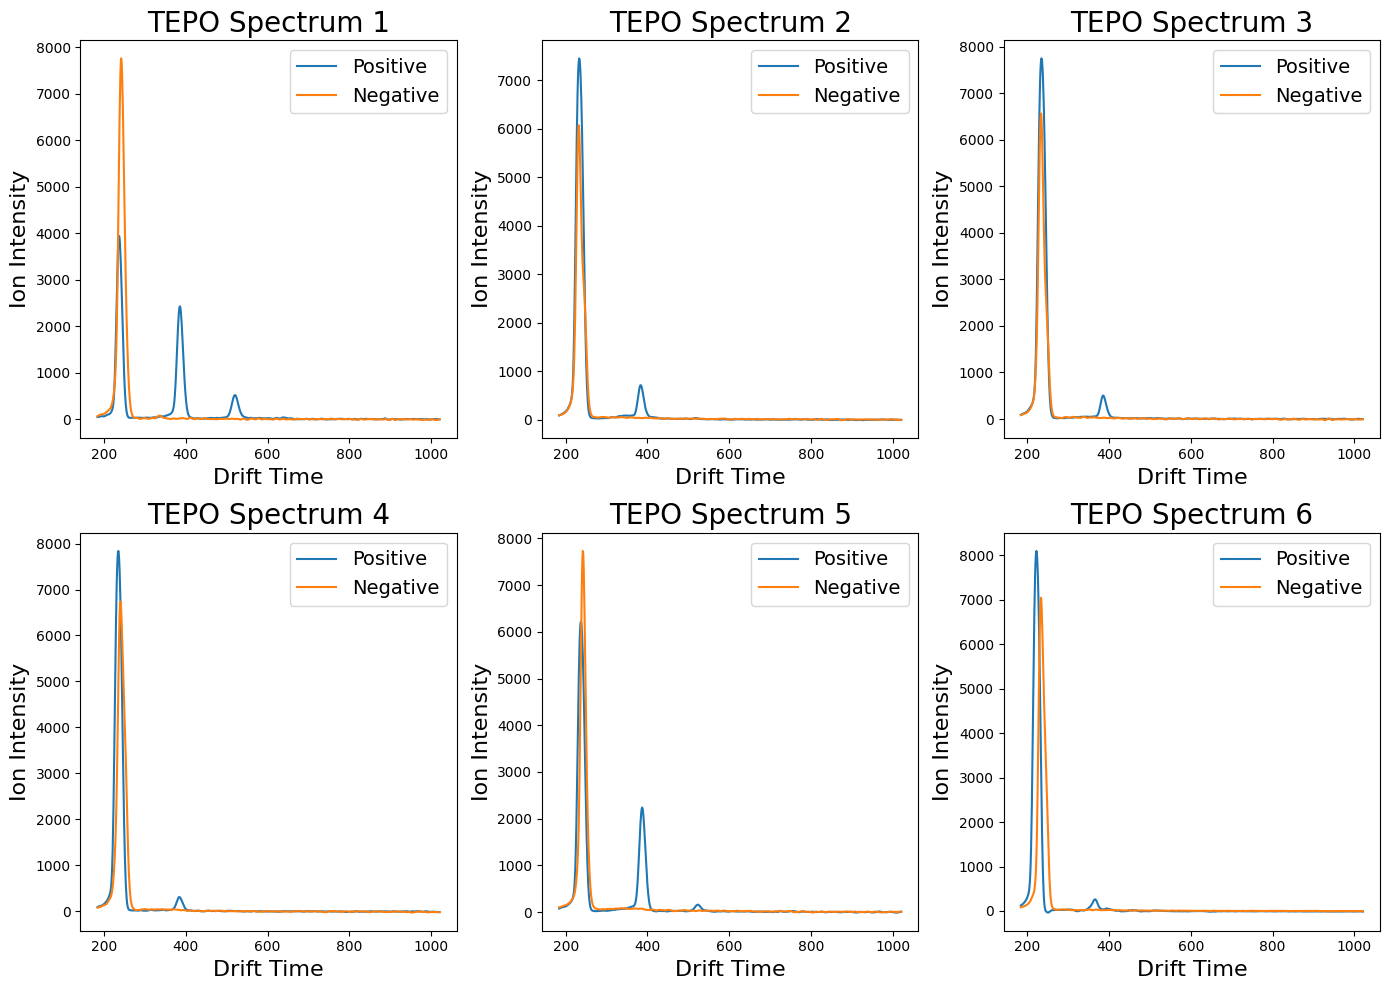

In [ ]:
chem = 'TEPO'

chem_true_spectra = test_spectra[test_spectra['Label'] == chem].reset_index(drop=True)
chem_synthetic_spectra = synthetic_spectra_df[synthetic_spectra_df['Label'] == chem].reset_index(drop=True)
test_sample = chem_true_spectra.sample(n=5).iloc[:,2:-9].reset_index(drop=True)
synthetic_sample = chem_synthetic_spectra.sample(n=1).iloc[:,:-1].reset_index(drop=True)

num_plots = 6
cols = 3  # Number of columns for the subplots
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, row in test_sample.iterrows():
    numbers = range(184, (len(row)//2)+184)

    axes[idx].plot(numbers, row[:len(numbers)], label='Positive')
    axes[idx].plot(numbers, row[len(numbers):], label='Negative')
    axes[idx].set_title(f'{chem} Spectrum {idx+1}', fontsize=20)
    axes[idx].set_xlabel('Drift Time', fontsize=16)
    axes[idx].set_ylabel('Ion Intensity', fontsize=16)
    axes[idx].legend(fontsize=14)

for idx, row in synthetic_sample.iterrows():
    numbers = range(184, (len(row)//2)+184)

    axes[5].plot(numbers, row[:len(numbers)], label='Positive')
    axes[5].plot(numbers, row[len(numbers):], label='Negative')
    axes[5].set_title(f'{chem} Spectrum 6', fontsize=20)
    axes[5].set_xlabel('Drift Time', fontsize=16)
    axes[5].set_ylabel('Ion Intensity', fontsize=16)
    axes[5].legend(fontsize=14)

plt.tight_layout()
plt.show()